In [ ]:
import pandas as pd

In [ ]:
independednt_X=pd.Series([1,2,3,4,5])
independednt_X

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
dependednt_Y=pd.Series([2,4,5,4,5])
dependednt_Y

0    2
1    4
2    5
3    4
4    5
dtype: int64

In [ ]:
print("X mean is:",independednt_X.mean())

X mean is: 3.0


In [ ]:
print("Y mean is:",dependednt_Y.mean())

Y mean is: 4.0


In [ ]:
independednt_Xmean=independednt_X.mean()

In [ ]:
dependednt_Ymean=dependednt_Y.mean()

In [ ]:
x_xmean=independednt_X-independednt_Xmean
x_xmean

0   -2.0
1   -1.0
2    0.0
3    1.0
4    2.0
dtype: float64

In [ ]:
y_ymean=dependednt_Y-dependednt_Ymean
y_ymean

0   -2.0
1    0.0
2    1.0
3    0.0
4    1.0
dtype: float64

# Student Marks Preduction

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame(
    [
        {"Hours":10,"GPA":3.1},{"Hours":9,"GPA":3.0},{"Hours":8,"GPA":2.9},{"Hours":7,"GPA":2.8},{"Hours":6,"GPA":2.6},
        {"Hours":5,"GPA":2.5},{"Hours":4,"GPA":2.4},{"Hours":3,"GPA":2.3},{"Hours":2,"GPA":1},{"Hours":1,"GPA":0.5},
        {"Hours":2,"GPA":2.5},{"Hours":3,"GPA":2.4},{"Hours":8,"GPA":2.3},{"Hours":1,"GPA":1},{"Hours":2,"GPA":0.5}
    ]
)

df.head()

,Hours,GPA
0,10,3.1
1,9,3.0
2,8,2.9
3,7,2.8
4,6,2.6


In [ ]:
df.shape

(15, 2)

In [ ]:
df.corr()

,Hours,GPA
Hours,1.000000,0.779274
GPA,0.779274,1.000000


In [ ]:
df.describe()

,Hours,GPA
count,15.000000,15.00000
mean,4.733333,2.12000
std,3.058166,0.89857
min,1.000000,0.50000
25%,2.000000,1.65000
50%,4.000000,2.40000
75%,7.500000,2.70000
max,10.000000,3.10000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   15 non-null     int64  
 1   GPA     15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 368.0 bytes


In [ ]:
X=df['Hours']
y=df['GPA']

In [ ]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [ ]:
x_train.shape

(12,)

In [ ]:
import numpy as np
x_train =np.array(x_train).reshape(-1,1)
x_test =np.array(x_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [ ]:
x_train.shape

(12, 1)

In [ ]:
from sklearn import linear_model

In [ ]:
lgr=linear_model.LinearRegression()
lgr=lgr.fit(x_train,y_train)

In [ ]:
lgr.intercept_

array([1.07484076])

In [ ]:
lgr.coef_

array([[0.22324841]])

In [ ]:
prediction=lgr.predict(x_test)

In [ ]:
prediction

array([[3.08407643],
       [1.96783439],
       [1.52133758]])

In [ ]:
y_test

array([[3. ],
       [2.4],
       [1. ]])

In [ ]:
from sklearn import metrics


print(metrics.mean_squared_error(y_test,prediction))

0.15520960958524344


Text(0, 0.5, 'Marks')

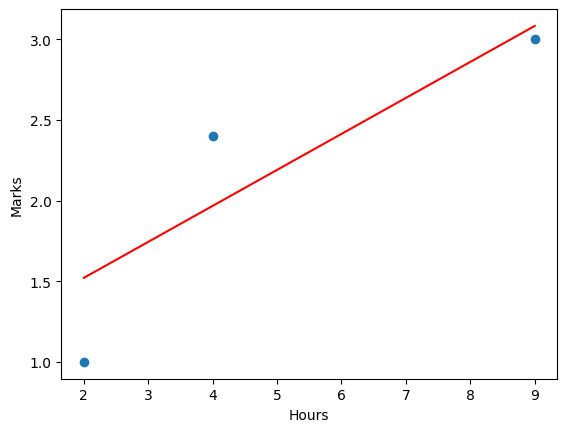

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_test,y_test)
plt.plot(x_test,prediction,color='red')
plt.xlabel('Hours')
plt.ylabel('Marks')

# Implement the Model from Scratch

In [ ]:
def simple_linear_regression(x,y):
  # Calculate the mean of the input features and target variables
  mean_X=np.mean(X)
  mean_y=np.mean(y)


  numerator=np.sum((X-mean_X)*(y-mean_y))
  denomirator=np.sum((X-mean_X)**2)

  theta_1=numerator/denomirator
  theta_0=mean_X-theta_1*mean_X

  return theta_0,theta_1

In [ ]:
def predict(X,theta_0,theta_1):
  return theta_0+theta_1*X

In [ ]:
def mse_calc(prediction,y_test):

  total_data=len(prediction)
  error=0
  error=(np.sum(prediction - y_test)**2)/total_data
  return error


In [ ]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt


class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                                  np.sum(Y_pred - Y)))

        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                                  np.sum((Y_pred - Y) * self.X)))

    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X:
            X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

        return Y_pred

    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
    # def predict(self, b, yi):

    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J

    def plot_best_fit(self, Y_pred, fig):
        f = plt.figure(fig)
        plt.scatter(self.X, self.Y, color='b')
        plt.plot(self.X, Y_pred, color='g')
        f.show()


def main():
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])

    regressor = Linear_Regression(X, Y)

    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []

    # original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)

        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",
                  regressor.get_current_accuracy(Y_pred))

            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break

    # final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

    # plot to verify cost function decreases
    h = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    h.show()

    # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])


if __name__ == '__main__':
    main()

# House Price Prediction

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [77]:
df =pd.read_excel('Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [79]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [78]:
X=df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
y=df['Y house price of unit area']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=70,random_state=0)

In [81]:
from sklearn.linear_model import LinearRegression

lgr=LinearRegression()
lgr=lgr.fit(x_train,y_train)

In [82]:
prediction=lgr.predict(x_test)

In [87]:
import warnings

warnings.filterwarnings('ignore')

In [88]:
us_house=[[5,100,9]]
print("The Predicted price is :",lgr.predict(us_house))

The Predicted price is : [52.46304763]
